In [289]:
import  pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib widget

# Formation energy as  chemical potential vary


In [290]:
pi=numpy.pi
convert=29979245800.0*2*pi # cm^-1 to Hz

 #### Total Energies in eV

In [291]:
E0=-6108318.476328624 # pristine
E1=-6174864.306138340 # addon S
E2=-6041768.483695555 # mono S vacancy
E3=-5975218.839354995 # di S vacancy up&down
E4=-5975218.551673065 # di S vacancy neighboring
E5=-5997073.704 # mono Mo vacancy
E_MoSe2=-244332.785924554 # primtitive
ESe8=-532375.657399940 #8 atoms in unitcell
EMo=-222473.348568306  # Total energy in eV

In [292]:
d0=pd.read_csv('w0', sep='\s+',header=0)
d1=pd.read_csv('addS', sep='\s+',header=0)
d2=pd.read_csv('VS', sep='\s+',header=0)
d3=pd.read_csv('VS2', sep='\s+',header=0)
d4=pd.read_csv('VS22', sep='\s+',header=0)
d5=pd.read_csv('VMo', sep='\s+',header=0)
dW=pd.read_csv('Mo_BCC', sep='\s+',header=0)
dSe=pd.read_csv('w_Se8', sep='\s+',header=0)
wSe=dSe['x']*convert
wW=dW['x']*convert # kj/mol to eV
w0=d0['w0']*convert
w1=d1['addS']*convert
w2=d2['VS']*convert
w3=d3['VS2']*convert
w4=d4['VS22']*convert
w5=d5['VMo']*convert #THZ to Hz

In [293]:
xr=np.array(np.arange(199.85,1326.85,10))

xr=1/xr

yr=(8.0886-(4989.5*xr))

pS=np.exp(yr)*0.00131579 #mmhg to atm

In [294]:
p0=1013250  # atm to g/(cm s^2) 

kk=1.380649e-16 # erg/k (cm^2.g/ks^2)
k=8.617333262145e-05 # ev/k
h=6.62607015e-27  # erg.s 
hb=6.582119569e-16 # eV.s
hbar=1.054571817e-27 # erg.s
sigma=8
m=1.04907603472e-21
IA=4.149045888664045e-37 
IB=4.149088585718857e-37
IC=7.612594467348306e-37




In [295]:
def free_energy(omega):
   F=[]
  
   omega = numpy.array(omega)
   for T in arange(199.85,1326.85,10):
      
     temp3=numpy.array([(hb*i/2 + k*T*np.log(1-math.exp(-(hb*i)/(k*T)))) for i in omega])
     F.append(numpy.sum(temp3))


   return F

In [296]:
def DeltaF(X,Y):
   deltaF=[]
   F1=free_energy(X)
   F2=free_energy(Y)
   zip_object = zip(F1, F2)
   for i, j in zip_object:    
       deltaF.append(i-j)
   return deltaF 

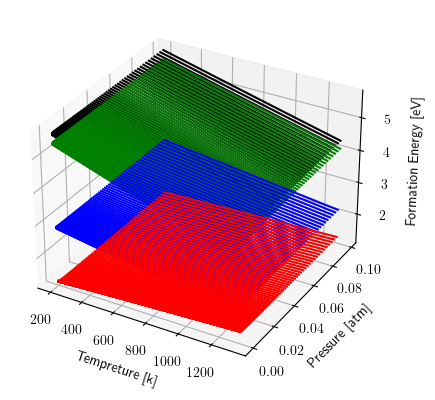

In [297]:
a_file = open("high.txt", "w")
fig = plt.figure()
ax = plt.axes(projection='3d')
#print(pS)
for p in pS*p0: 
   D=[]
   E=[]
   mu_0=[]
   mu_S8=[]
   mu_S8e=[] 
   addS=[]
   VS=[]
   VS2=[]
   VS22=[] 
   I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
   for T in arange(199.85,1326.85,10):
        A=np.log((((2*pi*m)**(3/2))*((kk*T)**(5/2)))/(p0*(h**3)))
        B=np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*kk*T)/(h**2))**(3/2))*I)
        temp=numpy.array([(np.log(1-math.exp(-(hbar*i)/(kk*T)))) for i in wSe])
        C=np.sum(temp)
        E.append(k*T*np.log(p/p0))
        mu_0.append(-k*T*(A+B-C)) 
        

#print('E',E)
#print('mu_0', mu_0)
   temp2=numpy.array([(hb*i)/(2) for i in wSe])
   D=np.sum(temp2)
   mu_S8=np.array(mu_0) + np.array(E) + D + ESe8 
   mu_Se=np.array(mu_S8)/8
   addS = [E1-E0-a + b for a, b in zip(mu_Se, DeltaF(w1,w0))]
   VS = [E2-E0+a + b for a, b in zip(mu_Se, DeltaF(w2,w0))]
   VS2 = [E3-E0+2*a + b for a, b in zip(mu_Se, DeltaF(w3,w0))]
   VS22 = [E4-E0+2*a + b for a, b in zip(mu_Se, DeltaF(w4,w0))]
#VMo = [E5-E0+a + b for a, b in zip(mu_Mo, DeltaF(w5,w0))]
   
   #mu_S8=np.array(mu_0) + np.array(E) + D + ESe8 
   
   T=arange(199.85,1326.85,10)
   a = np.empty(np.size(addS))
   a.fill(p)
 #  ax = plt.axes(projection='3d')
# Data for a three-dimensional line
   z1 = a/p0
    
#   print(z1)
   np.savetxt(a_file,  np.column_stack([T, z1, addS, VS, VS2, VS22]) ,delimiter=' ',comments='',header='T    P     addS     VS      VS2      VS22')


   ax.plot3D(T, z1,np.array(addS),'r')
   ax.plot3D(T, z1,np.array(VS),'b')
   ax.plot3D(T, z1,np.array(VS2),'g')
   ax.plot3D(T, z1,np.array(VS22),'k')
ax.set_xlabel(' Tempreture [k]')
ax.set_zlabel(' Formation Energy [eV]')
ax.set_ylabel(' Pressure [atm]')
#print(y22)
#plt.savefig('3D.png',dpi=400) 
#plt.show()
a_file.close()

In [308]:
dd=pd.read_csv("high.txt", sep='\s+',header=0)

In [309]:
x=dd['T']
y=dd['P']
z=dd['addS']
